Mini Project - Ana Rita Melo Ribeiro

The Boston Housing Dataset

# Introduction of the features and overall objective

Description of the datasabe columns:

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft

*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling

*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres

*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000

*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's


**NOTE:** I noticed that this list contains the feature B. In the dataset it came under the name "black"

**Target Variable:** Median house price (in $1000s - thousand dollars) - MEDV

**Goal:** predict housing prices based on **various features of the homes and their surrounding areas**. Contains information such as crime rate, number of rooms, property tax rates, and proximity to employment centers.

First task: import all necessary libraries and csv file.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

In [ ]:
path = "/content/train.csv"

dataset = pd.read_csv(path)
dataset.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# 1. What is the shape of the dataset

In [ ]:
dataset.shape

(306, 15)

# 2. What are the data types of each feature

In [ ]:
print(dataset.dtypes)

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object


Where:
int64 - whole number (integer)
float64 - decimal

# 3. How many observations and features are in the dataset?

Observations: rows;
Features: columns

In [ ]:
num_observations, num_features = dataset.shape

print(f"Number of observations: {num_observations}")
print(f"Number of features: {num_features}")

Number of observations: 306
Number of features: 15


15 columns but only 13 features (ID column not used and MEDV as target variable).

# 4. Are there any missing or null values in the dataset?

In [ ]:
dataset.info()
missing_values = dataset.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       306 non-null    int64  
 1   crim     306 non-null    float64
 2   zn       306 non-null    float64
 3   indus    306 non-null    float64
 4   chas     306 non-null    int64  
 5   nox      306 non-null    float64
 6   rm       306 non-null    float64
 7   age      306 non-null    float64
 8   dis      306 non-null    float64
 9   rad      306 non-null    int64  
 10  tax      306 non-null    int64  
 11  ptratio  306 non-null    float64
 12  black    306 non-null    float64
 13  lstat    306 non-null    float64
 14  medv     306 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 36.0 KB
ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dt

There is no null or missing values.

First, I believe it makes sense to narrow down the number os variables that I am going to use. For example, from my point of view, it makes no sense to use column ID to plot graphs. With that said, I choose to eliminate that feature from the dataset.

In [ ]:
selected_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
dataset = dataset[selected_features + ['medv']]

# 5. What is the distribution of the target variable, i.e., the median house value?

'medv' is my target variable column.

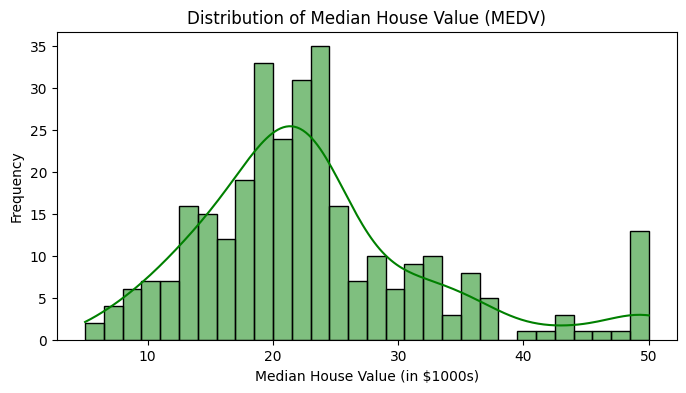

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(dataset['medv'], bins=30, kde=True, color='green')
plt.title('Distribution of Median House Value (MEDV)')
plt.xlabel('Median House Value (in $1000s)')
plt.ylabel('Frequency')
plt.show()

Shape of the histogram: slightly right, meaning there are more houses with lower median values and a tail extending towards higher values

Peaks: There might be a primary peak around the 20,000 - $25,000 range, indicating a higher concentration of houses with median values within this bracket.

Outliers: There could be a potential gap or fewer data points in the higher price ranges (above $45,000), which might indicate the presence of some outliers or a smaller number of expensive houses in the dataset.

In [ ]:
dataset['medv'].describe()

,medv
count,306.000000
mean,23.137908
std,9.406928
min,5.000000
25%,17.450000
50%,22.000000
75%,26.475000
max,50.000000


**Some conclusions:**

The mean around 23,100 thousand dollars is slightly higher than the median around 22,000 further supporting the right-skewness of the distribution.

The standard deviation around $9,400 suggests a moderate level of variability in median house values (some houses are priced much lower, while others are higher).


Range: The minimum value is 5,000 thousand dollars (cheapest house) and the maximum value is $50,000, indicating a wide range of house prices in the dataset.

75% of the houses have a median value below $26,475.

25% of houses have a median value below 17,450 thousand dollars.

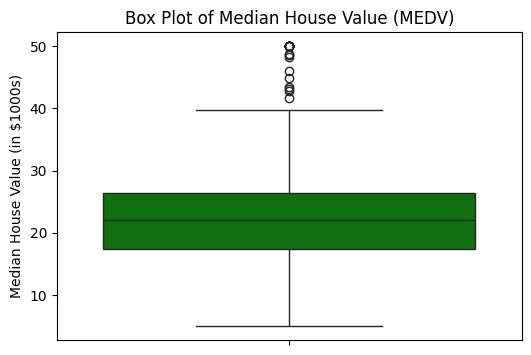

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=dataset['medv'], color='green')
plt.title('Box Plot of Median House Value (MEDV)')
plt.ylabel('Median House Value (in $1000s)')
plt.show()

Other way to check the distribution of the target variable "MEDV". However, by personal opinion, I have more sense of the values with a histogram analysis.
The only advantage I see on showing this boxplot is that in this way we have more awareness of the potential outliers of the feature.

Outliers: There are some data points beyond the upper whisker of the box plot, which are considered potential outliers. These represent houses with unusually high median values compared to the rest of the dataset.

Overall Interpretation:

The analysis suggests that the median house values in the dataset are mostly concentrated in the **lower to mid-price ranges**, with a right-skewed distribution. There are a few houses with significantly higher values, which might be considered outliers. The data exhibits moderate variability, with a standard deviation of around $9,400.

# 6. What is the range of values for each feature?

In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,3.258591,11.632353,10.730000,0.065359,0.554918,6.289438,67.375817,3.804482,9.104575,393.872549,18.294118,357.346340,12.326863,23.137908
std,7.517139,23.423324,6.854357,0.247564,0.119441,0.718480,28.756316,2.032123,8.399971,163.200812,2.174554,89.808848,7.176646,9.406928
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.073087,0.000000,4.930000,0.000000,0.449000,5.888250,41.675000,2.122250,4.000000,277.000000,16.825000,376.707500,6.757500,17.450000
50%,0.247510,0.000000,8.140000,0.000000,0.520000,6.214000,76.600000,3.215700,5.000000,312.000000,18.600000,391.770000,10.405000,22.000000
75%,2.448818,19.500000,18.100000,0.000000,0.647000,6.627250,93.875000,5.276650,8.000000,437.000000,20.200000,396.192500,16.227500,26.475000
max,73.534100,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,666.000000,21.200000,396.900000,37.970000,50.000000


First, I applied a describe to understand all the values assigned to each feature (descriptive statistic).

In [ ]:
max_range = dataset.describe().loc[['max']]
print(max_range)

        crim     zn  indus  chas    nox     rm    age      dis   rad    tax  \
max  73.5341  100.0  25.65   1.0  0.871  8.725  100.0  10.7103  24.0  666.0   

     ptratio  black  lstat  medv  
max     21.2  396.9  37.97  50.0  


In [ ]:
min_range = dataset.describe().loc[['min']]
print(min_range)

        crim   zn  indus  chas    nox     rm  age     dis  rad    tax  \
min  0.00632  0.0   0.74   0.0  0.385  3.561  6.0  1.1296  1.0  188.0   

     ptratio  black  lstat  medv  
min     12.6    3.5   1.73   5.0  


# 7. How are the different features correlated with each other?

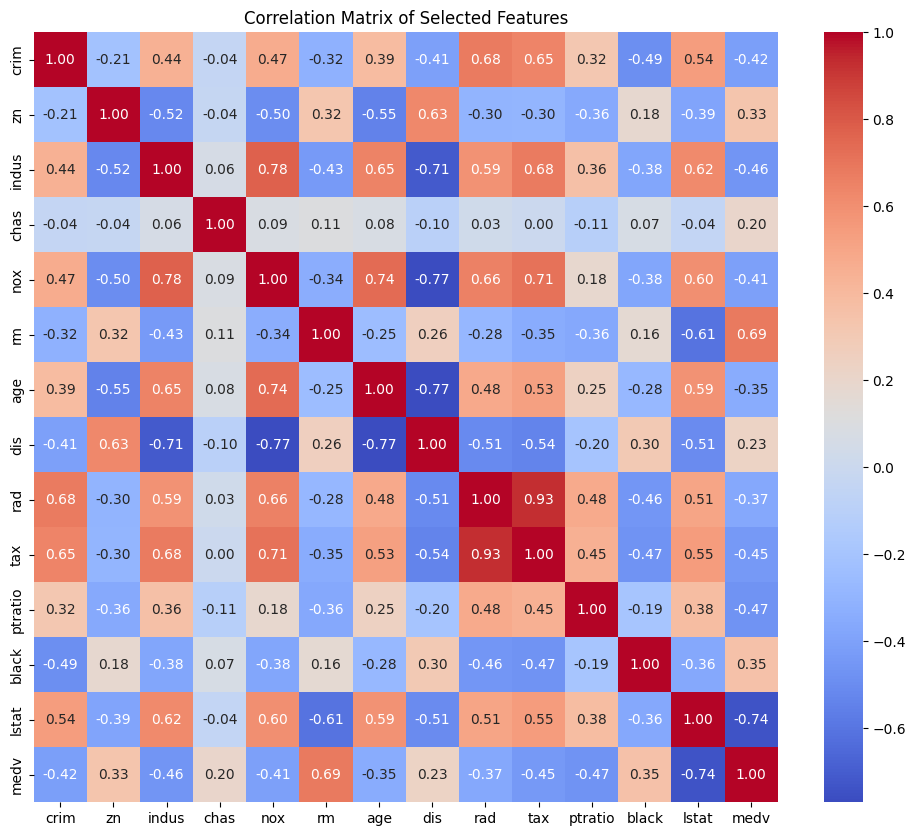

In [ ]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

**Overall interpretation:**

**Strong Positive Correlations (Closer to +1):**

RM (Avg. number of rooms) vs. MEDV (House Price)- Strong positive correlation (~0.7)
More rooms generally mean higher house prices.

**Strong Negative Correlations (Closer to -1):**

LSTAT (Lower status population) vs. MEDV - Strong negative correlation (~ -0.74)
Areas with a higher percentage of lower-income households tend to have lower house prices.

PTRATIO (Pupil-teacher ratio) vs. MEDV (~ -0.47) - Moderate negative correlation
Higher student-to-teacher ratios tend to be in areas with lower house prices.

CRIM (Crime rate) vs. MEDV - Negative correlation (~ -0.42)
Higher crime rates are associated with lower home values.

TAX (Property tax) and RAD (Highway accessibility) are highly correlated (~0.91). This suggests that areas with more highway access tend to have higher property taxes.

NOX (Pollution levels) and INDUS (Non-retail land proportion) are positively correlated. More industrial areas tend to have higher pollution levels

**Main conclusions:**

RM and LSTAT are the most important features affecting house prices.
Crime rate, pollution, and student-to-teacher ratio also impact housing values significantly.
Some features (like TAX and RAD) have strong correlations but may not directly influence house prices.

**Note:** however, I decided to continue the notebook keeping every feature. It makes sense to me to use all the data presented on the dataset for now.

# 8. Are there any outliers in the dataset?

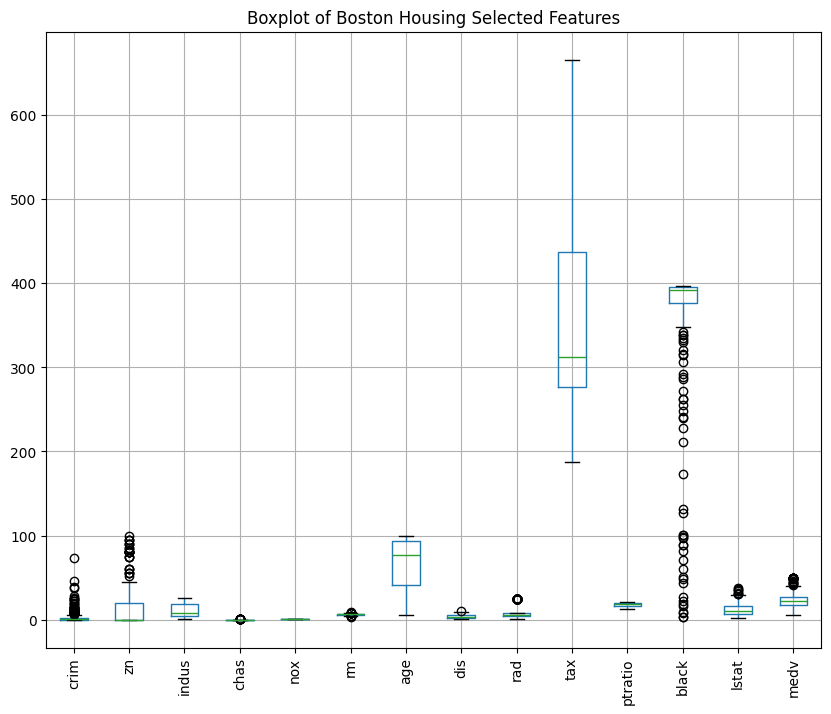

In [ ]:
plt.figure(figsize=(10, 8))
dataset.boxplot(rot=90)
plt.title(f"Boxplot of Boston Housing Selected Features")
plt.ylabel('')
plt.show()

In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(dataset))
outliers = (z_scores > 3).sum(axis=0)
outliers

,0
crim,6
zn,10
indus,0
chas,20
nox,0
rm,3
age,0
dis,1
rad,0
tax,0


Needed to check some info about the Z-scores. However, found it quite an interesting way to check for outliers. Gonna let the info here on the notebook for future consult.

**Z-score Basics:**

The Z-score represents how many standard deviations a data point is away from the mean.

A Z-score of 0 means the data point is exactly at the mean.

A Z-score of 1 means the data point is one standard deviation above the mean.

A Z-score of -1 means the data point is one standard deviation below the mean.

**Why Z-score > 3?**

**Normally distributed data:** If your data follows a normal distribution (bell curve), approximately 99.7% of the data points will fall within ±3 standard deviations from the mean. In other words, only about 0.3% of the data will have a Z-score greater than 3 or less than -3.

**Outliers:** Data points with Z-scores greater than +3 or less than -3 are considered rare or extreme, and often flagged as outliers because they lie far from the central tendency of the data.

**Summary:**

**Z-score > 3:** Typically used to identify data points that are 3 standard deviations above the mean, indicating that these values are unusually large.

We can see outliers in CRIM, ZN, CHAS, RM, DIS, BLACK and LSTAT.

Would it make sense to remove extreme outliers that could possibly afect the model result?

In [ ]:
Q1 = dataset.drop(columns='medv').quantile(0.25)
Q3 = dataset.drop(columns='medv').quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((dataset.drop(columns='medv') < lower_bound) | (dataset.drop(columns='medv') > upper_bound)).any(axis=1)

dataset_no_outliers_iqr = dataset[~outliers_iqr]

print(f"Original shape: {dataset.shape}")
print(f"Shape after removing outliers (IQR method): {dataset_no_outliers_iqr.shape}")

Original shape: (306, 14)
Shape after removing outliers (IQR method): (169, 14)


# 9. What is the frequency distribution of each categorical feature (if any)?

For personal info:

 **Categorical feature** (or categorical variable) is a type of variable that takes on discrete values from a limited set of categories or labels. These categories represent qualitative data, meaning they describe characteristics, attributes, or qualities that can't be measured in numeric terms.


Binary feature:

CHAS (Charles River Dummy Variable) - Indicates whether the property is near the Charles River.
0 = Not near the river
1 = Near the river

In [ ]:
chas_counts = dataset["chas"].value_counts()
print(chas_counts)

chas
0    286
1     20
Name: count, dtype: int64


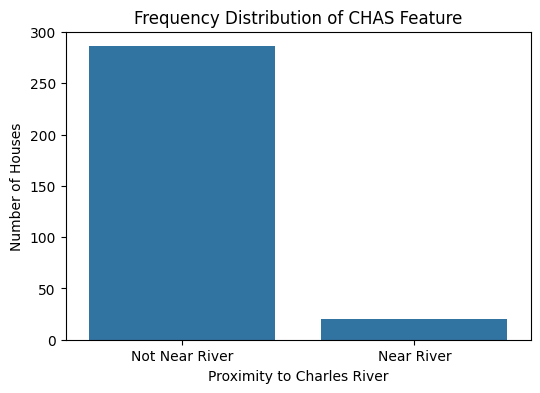

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=chas_counts.index, y=chas_counts.values)
plt.xticks([0, 1], ["Not Near River", "Near River"])
plt.xlabel("Proximity to Charles River")
plt.ylabel("Number of Houses")
plt.title("Frequency Distribution of CHAS Feature")
plt.show()

From the 306 houses from the datase, 286 are not close to the river, otherwise 20 are close to the river.

Just for curiosity, from those 20, does it have any kind of correlation with higher house prices (Is CHAS = 1 correlated with higher MEDV values?)

In [ ]:
chas_mean_prices = dataset.groupby('chas')['medv'].mean()
print(chas_mean_prices)

chas
0    22.645804
1    30.175000
Name: medv, dtype: float64


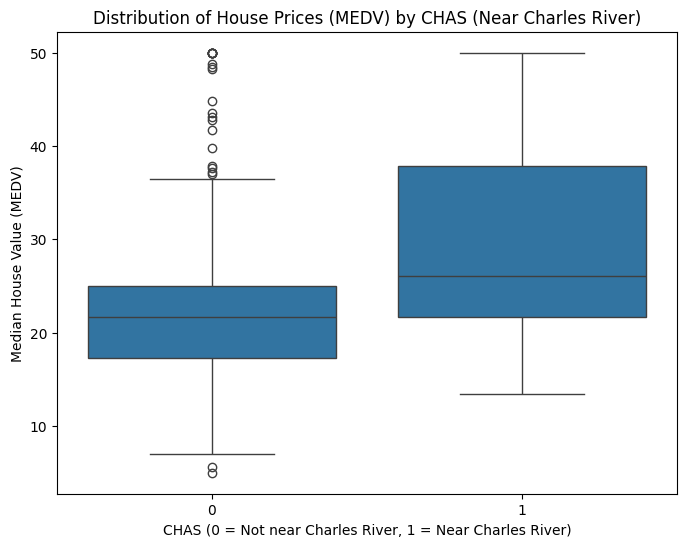

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='chas', y='medv', data=dataset)
plt.title('Distribution of House Prices (MEDV) by CHAS (Near Charles River)')
plt.xlabel('CHAS (0 = Not near Charles River, 1 = Near Charles River)')
plt.ylabel('Median House Value (MEDV)')
plt.show()

CORRECT! From the 20 houses close to the river, they have the tendency to have a higher price.

# 10. Are there any patterns in the relationship between the MEDV and the PTRATIO in the neighborhood?

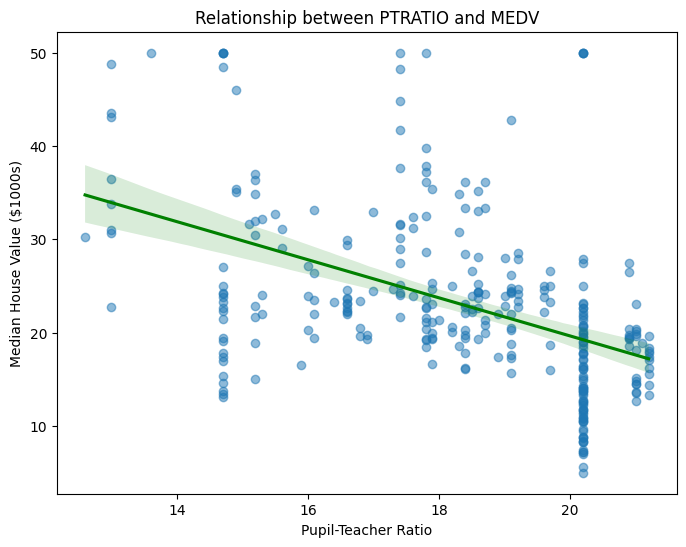

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x=dataset["ptratio"], y=dataset["medv"], scatter_kws={"alpha":0.5}, line_kws={"color":"green"})
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Median House Value ($1000s)")
plt.title("Relationship between PTRATIO and MEDV")
plt.show()

In [ ]:
corr_ptratio_medv = dataset["ptratio"].corr(dataset["medv"])
print(f"Correlation coefficient: {corr_ptratio_medv:.2f}")

Correlation coefficient: -0.47


CONCLUSION:

Moderate negative relationship - higher PTRATIO (fewer teachers per student) tends to be associated with lower house prices.
This suggests that better school quality (lower PTRATIO) is linked to higher home values.

# 11. Share any only other insight that you consider relevant.

During the notebook I shared some notes and analysis that I found curious.

Just to add:

The feature LSTAT (Lower-income population) has the strongest impact on house prices:

There is a **strong negative correlation** (~ -0.74) between LSTAT (percentage of lower-status population) and MEDV (house price).

**Higher poverty levels → Lower home values**.
This suggests socioeconomic status is a major driver of housing prices.

It could be noteworthy to show the correlation between **LSTAT and MEDV** (after analysis of the heatmap, I found no other feature that was noteworthy to perform an isolated analysis).

In [ ]:
lstat_medv_correlation = dataset['lstat'].corr(dataset['medv'])
print(f'Correlation between LSTAT and MEDV: {lstat_medv_correlation}')

Correlation between LSTAT and MEDV: -0.7393525748759769


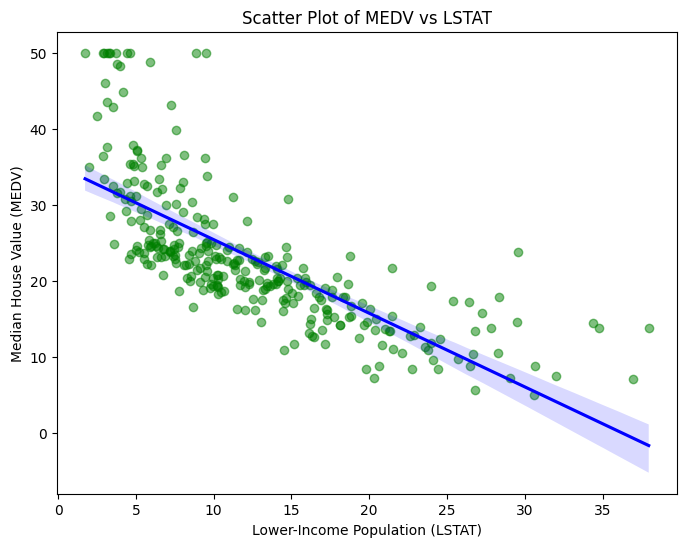

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='lstat', y='medv', data=dataset, color='green', scatter_kws={"alpha":0.5}, line_kws={"color":"blue"})
plt.title('Scatter Plot of MEDV vs LSTAT')
plt.xlabel('Lower-Income Population (LSTAT)')
plt.ylabel('Median House Value (MEDV)')
plt.show()

# 12. Fit a model to predict the median house value.

In [ ]:
X = dataset.drop(columns=["medv"])
y = dataset["medv"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")

Training size: (244, 13), Test size: (62, 13)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse_full = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_full)
r2_full = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse_full:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2_full:.2f}")

Mean Absolute Error (MAE): 3.24
Mean Squared Error (MSE): 19.52
Root Mean Squared Error (RMSE): 4.42
R² Score: 0.70


This Linear Regression model was applied on data without further transformation or remotion of outliers. However, R² = 0.70, means that this model is doing reasonably well since it explains 70% of the variance in the target variable MEDV.

Looked for another model (found an extensive list of other models, but choose the one that I remember we slightly talked during class - Random Tree).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf_full = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf_full)
r2_rf_full = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf_full:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf_full:.2f}")

Random Forest Model:
Mean Absolute Error (MAE): 1.98
Mean Squared Error (MSE): 6.43
Root Mean Squared Error (RMSE): 2.54
R² Score: 0.90


This one showed better R² Score compared with simple linear regression.

In [ ]:
print("Model Comparison:")
print(f"Linear Regression R²: {r2_full:.2f}")
print(f"Random Forest R²: {r2_rf_full:.2f}")

Model Comparison:
Linear Regression R²: 0.70
Random Forest R²: 0.90


In [ ]:
model = ['LinearRegression', 'RandomForest']
mse_values = [mse_full, mse_rf_full]
r2_values = [r2_full, r2_rf_full]

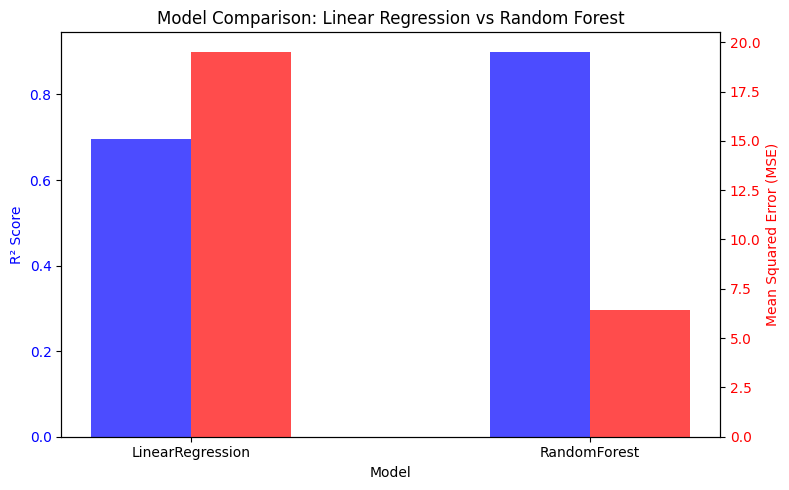

In [ ]:
x = np.arange(len(model))
width = 0.25

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(x - width/2, r2_values, width, label='R² Score', color='b', alpha=0.7)
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Model Comparison: Linear Regression vs Random Forest')

ax2 = ax1.twinx()
ax2.bar(x + width/2, mse_values, width, label='MSE', color='r', alpha=0.7)
ax2.set_ylabel('Mean Squared Error (MSE)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.set_xticks(x)
ax1.set_xticklabels(model)

fig.tight_layout()
plt.show()

According with some research and bibliography, **Lower MSE** values indicates better model performance since the R² score tells how well the model fits the data and the MSE tells how well the model predicts the target variable.

So, according with these models (**without any removal of outliers**), the best model seems to be RANDOM FOREST (significant difference of R² score and LOWER MSE).

12.1 Fit a model to predict the median house value (new models with removal of extreme outliers).

In [ ]:
X = dataset_no_outliers_iqr.drop(columns=["medv"])
y = dataset_no_outliers_iqr["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Training size: (135, 13), Test size: (34, 13)
Mean Absolute Error (MAE): 1.68
Mean Squared Error (MSE): 4.42
Root Mean Squared Error (RMSE): 2.10
R² Score: 0.85


R² Score went from 0.70 to 0.85, increasing the model's accuracy by around 20% when removing the extreme outliers.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Model:
Mean Absolute Error (MAE): 1.93
Mean Squared Error (MSE): 5.11
Root Mean Squared Error (RMSE): 2.26
R² Score: 0.82


In terms of the random forest model, the accuracy (R² Score) of this model dropped to 0.82, which was not extremely significant.

In [ ]:
models = ['Linear Regression', 'Random Forest']
mse_values = [mse, mse_rf]
r2_values = [r2, r2_rf]

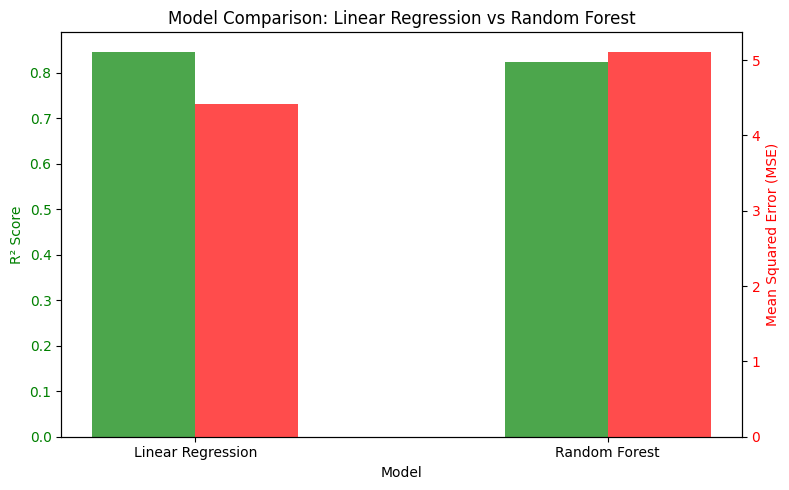

In [ ]:
x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(x - width/2, r2_values, width, label='R² Score', color='g', alpha=0.7)
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Score', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_title('Model Comparison: Linear Regression vs Random Forest')

ax2 = ax1.twinx()
ax2.bar(x + width/2, mse_values, width, label='MSE', color='r', alpha=0.7)
ax2.set_ylabel('Mean Squared Error (MSE)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.set_xticks(x)
ax1.set_xticklabels(models)

fig.tight_layout()
plt.show()

Quite different from the previous designed models (without any removal of outliers), these ones (with removal of extreme outliers) seems to have a better performance, in accordance with the paradigm that treated and cleaned data provide better models with better accuracy.

So, according with these models (**with removal of outliers**), the best model seems to be LINEAR REGRESSION (no significant difference of R² score and LOWER MSE).

# Main Conclusions

**Model Performance**

The chosen regression models (Linear Regression and Random Forest) were able to predict housing prices with a reasonable degree of accuracy. Among them, Random Forest outperformed better in terms of MSE and R² on the test set including all outliers. When the outliers were removed, Linear Regression showed the best accuracy.

**Key Features Influencing Price**

Variables such as average number of rooms per dwelling (RM), percentage of lower status population (LSTAT), and pupil-teacher ratio (PTRATIO) were identified as the most influential in predicting housing prices.